In [1]:
import numpy as np
import torch


import json
from torch.utils.data import DataLoader
from torch.optim import SGD 
from torch import nn

c:\Users\FarinhOso\anaconda3\envs\tfg\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import utils_generic as generic
import singletask_simple as st
import model_confs as confs

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)

# Datos ConvAI2

In [4]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [5]:
convai_train = data['train']
convai_val = data['validation']



convai_train_token = generic.tokenize_dataset(convai_train,['about','to','as'],"bert-base-uncased") 
convai_val_token = generic.tokenize_dataset(convai_val,['about','to','as'],"bert-base-uncased") 

In [6]:
convai_train_dataset = {}
for task in ['to','as','about']:
    convai_train_dataset[task] = st.DatasetSingleTaskSimple(convai_train_token,task,eval=False)

In [7]:
convai_val_dataset = {}
for task in ['to','as','about']:
    convai_val_dataset[task] = st.DatasetSingleTaskSimple(convai_val_token,task,eval=False)

## Datos md_gender

In [8]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [9]:
md_tokenized = generic.tokenize_dataset(md_data,['about','to','as'],"bert-base-uncased") 


md_dataset = {}
for task in ['to','as','about']:
    md_dataset[task] = st.DatasetSingleTaskSimple(md_tokenized,task,eval=True)

# Creaci√≥n dataloaders

In [10]:
dl_train = {}
for task in ['to','as','about']:
    dl_train[task] = DataLoader(convai_train_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [11]:
dl_val = {}
for task in ['to','as','about']:
    dl_val[task] = DataLoader(convai_val_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [12]:
dl_eval = {}
for task in ['to','as','about']:
    dl_eval[task] = DataLoader(md_dataset[task],batch_size=128,shuffle=False,collate_fn=st.collate_fn)

# ABOUT

In [13]:
model = st.SingleTaskSimple(confs.bert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  1%|          | 572/57400 [00:40<1:02:38, 15.12it/s]

Epoch 1 	 Training loss: 0.7197910133969908 	 Validation loss: 0.6730313149549193 


  1%|          | 577/57400 [00:41<3:11:48,  4.94it/s]

  1%|          | 574/57400 [00:41<1:02:38, 15.12it/s]


  2%|‚ñè         | 1147/57400 [01:18<57:57, 16.18it/s]  

Epoch 2 	 Training loss: 0.6391846066152592 	 Validation loss: 0.5714475674144293 


  2%|‚ñè         | 1151/57400 [01:20<3:36:11,  4.34it/s]

  2%|‚ñè         | 1148/57400 [01:20<57:57, 16.18it/s]


  3%|‚ñé         | 1721/57400 [01:58<1:01:08, 15.18it/s]

Epoch 3 	 Training loss: 0.49713490581470915 	 Validation loss: 0.42568988214104864 


  3%|‚ñé         | 1725/57400 [01:59<3:35:40,  4.30it/s]

  3%|‚ñé         | 1722/57400 [01:59<1:01:08, 15.18it/s]


  4%|‚ñç         | 2295/57400 [02:37<1:03:27, 14.47it/s]

Epoch 4 	 Training loss: 0.40525624005429006 	 Validation loss: 0.3734900102776996 


  4%|‚ñç         | 2299/57400 [02:39<3:35:53,  4.25it/s]

  4%|‚ñç         | 2296/57400 [02:38<1:03:27, 14.47it/s]


  5%|‚ñç         | 2869/57400 [03:16<1:09:42, 13.04it/s]

Epoch 5 	 Training loss: 0.3694874882075014 	 Validation loss: 0.35080607008125825 


  5%|‚ñå         | 2873/57400 [03:18<3:32:07,  4.28it/s]

  5%|‚ñå         | 2870/57400 [03:18<1:09:42, 13.04it/s]


  6%|‚ñå         | 3443/57400 [03:56<58:55, 15.26it/s]  

Epoch 6 	 Training loss: 0.34951479642129524 	 Validation loss: 0.33134004296892783 


  6%|‚ñå         | 3445/57400 [03:57<4:11:27,  3.58it/s]

  6%|‚ñå         | 3444/57400 [03:57<58:55, 15.26it/s]


  7%|‚ñã         | 4018/57400 [04:35<53:43, 16.56it/s]  

Epoch 7 	 Training loss: 0.33471406118795016 	 Validation loss: 0.321418947587579 


  7%|‚ñã         | 4020/57400 [04:37<4:20:20,  3.42it/s]

  7%|‚ñã         | 4018/57400 [04:37<53:43, 16.56it/s]


  8%|‚ñä         | 4591/57400 [05:15<1:00:22, 14.58it/s]

Epoch 8 	 Training loss: 0.32760367791723294 	 Validation loss: 0.31335621895426413 


  8%|‚ñä         | 4593/57400 [05:16<4:24:21,  3.33it/s]

  8%|‚ñä         | 4592/57400 [05:16<1:00:21, 14.58it/s]


  9%|‚ñâ         | 5165/57400 [05:54<56:44, 15.34it/s]  

Epoch 9 	 Training loss: 0.31947599483803174 	 Validation loss: 0.3068339587268183 


  9%|‚ñâ         | 5169/57400 [05:56<3:25:10,  4.24it/s]

  9%|‚ñâ         | 5166/57400 [05:56<56:44, 15.34it/s]


 10%|‚ñà         | 5740/57400 [06:34<54:24, 15.83it/s]  

Epoch 10 	 Training loss: 0.31146489971606156 	 Validation loss: 0.3001707466477055 


 10%|‚ñà         | 5742/57400 [06:35<4:22:28,  3.28it/s]

 10%|‚ñà         | 5740/57400 [06:35<54:24, 15.83it/s]


 11%|‚ñà         | 6313/57400 [07:13<55:29, 15.34it/s]  

Epoch 11 	 Training loss: 0.30439116081501966 	 Validation loss: 0.297566682100296 


 11%|‚ñà         | 6317/57400 [07:15<3:19:48,  4.26it/s]

 11%|‚ñà         | 6314/57400 [07:15<55:29, 15.34it/s]


 12%|‚ñà‚ñè        | 6886/57400 [07:53<55:48, 15.09it/s]  

Epoch 12 	 Training loss: 0.3000693858604398 	 Validation loss: 0.2917554502264928 


 12%|‚ñà‚ñè        | 6891/57400 [07:55<2:56:36,  4.77it/s]

 12%|‚ñà‚ñè        | 6888/57400 [07:55<55:48, 15.09it/s]


 13%|‚ñà‚ñé        | 7461/57400 [08:35<54:44, 15.20it/s]  

Epoch 13 	 Training loss: 0.295041652480692 	 Validation loss: 0.28939995346433023 


 13%|‚ñà‚ñé        | 7465/57400 [08:37<3:23:40,  4.09it/s]

 13%|‚ñà‚ñé        | 7462/57400 [08:36<54:44, 15.20it/s]


 14%|‚ñà‚ñç        | 8036/57400 [09:15<52:23, 15.70it/s]  

Epoch 14 	 Training loss: 0.28984763218862253 	 Validation loss: 0.2867630851470818 


 14%|‚ñà‚ñç        | 8038/57400 [09:17<4:21:40,  3.14it/s]

 14%|‚ñà‚ñç        | 8036/57400 [09:17<52:23, 15.70it/s]


 15%|‚ñà‚ñå        | 8610/57400 [09:55<49:24, 16.46it/s]  

Epoch 15 	 Training loss: 0.2873732724100455 	 Validation loss: 0.28535741517099283 


 15%|‚ñà‚ñå        | 8612/57400 [09:57<4:14:21,  3.20it/s]

 15%|‚ñà‚ñå        | 8610/57400 [09:56<49:24, 16.46it/s]


 16%|‚ñà‚ñå        | 9183/57400 [10:34<51:12, 15.69it/s]  

Epoch 16 	 Training loss: 0.2826307163628967 	 Validation loss: 0.2823800722421226 


 16%|‚ñà‚ñå        | 9185/57400 [10:36<4:09:58,  3.21it/s]

 16%|‚ñà‚ñå        | 9184/57400 [10:36<51:12, 15.69it/s]


 17%|‚ñà‚ñã        | 9757/57400 [11:14<48:51, 16.25it/s]  

Epoch 17 	 Training loss: 0.2794107764907415 	 Validation loss: 0.281279043373415 


 17%|‚ñà‚ñã        | 9759/57400 [11:16<3:55:32,  3.37it/s]

 17%|‚ñà‚ñã        | 9758/57400 [11:16<48:51, 16.25it/s]


 18%|‚ñà‚ñä        | 10332/57400 [11:54<51:01, 15.37it/s]  

Epoch 18 	 Training loss: 0.2780084070532164 	 Validation loss: 0.27756305316747243 


 18%|‚ñà‚ñä        | 10334/57400 [11:56<4:03:05,  3.23it/s]

 18%|‚ñà‚ñä        | 10332/57400 [11:56<51:01, 15.37it/s]


 19%|‚ñà‚ñâ        | 10909/57400 [12:36<2:40:56,  4.81it/s]

Epoch 19 	 Training loss: 0.27503353796042634 	 Validation loss: 0.2786740433361571 

1 epoch without improvement
 19%|‚ñà‚ñâ        | 10906/57400 [12:36<50:14, 15.42it/s]


 20%|‚ñà‚ñâ        | 11478/57400 [13:14<52:23, 14.61it/s]  

Epoch 20 	 Training loss: 0.27161121415136585 	 Validation loss: 0.2774297100002483 


 20%|‚ñà‚ñà        | 11483/57400 [13:16<2:50:08,  4.50it/s]

 20%|‚ñà‚ñà        | 11480/57400 [13:16<52:22, 14.61it/s]


 21%|‚ñà‚ñà        | 12053/57400 [13:54<50:21, 15.01it/s]  

Epoch 21 	 Training loss: 0.2690578611366425 	 Validation loss: 0.27365888453136056 


 21%|‚ñà‚ñà        | 12057/57400 [13:56<2:54:24,  4.33it/s]

 21%|‚ñà‚ñà        | 12054/57400 [13:55<50:21, 15.01it/s]


 22%|‚ñà‚ñà‚ñè       | 12628/57400 [14:34<46:27, 16.06it/s]  

Epoch 22 	 Training loss: 0.26789024178886245 	 Validation loss: 0.2721617135961177 


 22%|‚ñà‚ñà‚ñè       | 12630/57400 [14:35<3:46:26,  3.30it/s]

 22%|‚ñà‚ñà‚ñè       | 12628/57400 [14:35<46:27, 16.06it/s]


 23%|‚ñà‚ñà‚ñé       | 13201/57400 [15:13<51:08, 14.40it/s]  

Epoch 23 	 Training loss: 0.2644553934499777 	 Validation loss: 0.27176360659680127 


 23%|‚ñà‚ñà‚ñé       | 13203/57400 [15:15<3:40:40,  3.34it/s]

 23%|‚ñà‚ñà‚ñé       | 13202/57400 [15:15<51:08, 14.40it/s]


 24%|‚ñà‚ñà‚ñç       | 13775/57400 [15:52<45:25, 16.01it/s]  

Epoch 24 	 Training loss: 0.2614690197521386 	 Validation loss: 0.2700839093175985 


 24%|‚ñà‚ñà‚ñç       | 13777/57400 [15:54<3:33:32,  3.40it/s]

 24%|‚ñà‚ñà‚ñç       | 13776/57400 [15:54<45:25, 16.01it/s]


 25%|‚ñà‚ñà‚ñå       | 14353/57400 [16:33<2:11:46,  5.44it/s]

Epoch 25 	 Training loss: 0.25969958115849345 	 Validation loss: 0.2719592459626117 

1 epoch without improvement
 25%|‚ñà‚ñà‚ñå       | 14350/57400 [16:33<46:22, 15.47it/s]


 26%|‚ñà‚ñà‚ñå       | 14922/57400 [17:10<47:14, 14.99it/s]  

Epoch 26 	 Training loss: 0.25760068157720234 	 Validation loss: 0.26871773903652774 


 26%|‚ñà‚ñà‚ñå       | 14925/57400 [17:12<3:11:05,  3.70it/s]

 26%|‚ñà‚ñà‚ñå       | 14924/57400 [17:12<47:14, 14.99it/s]


 27%|‚ñà‚ñà‚ñã       | 15501/57400 [17:51<2:16:59,  5.10it/s]

Epoch 27 	 Training loss: 0.2564473418772013 	 Validation loss: 0.26878244593992073 
 27%|‚ñà‚ñà‚ñã       | 15498/57400 [17:50<45:37, 15.31it/s]


 28%|‚ñà‚ñà‚ñä       | 16071/57400 [18:28<42:31, 16.20it/s]  

Epoch 28 	 Training loss: 0.254173284000636 	 Validation loss: 0.26670832199565436 


 28%|‚ñà‚ñà‚ñä       | 16075/57400 [18:30<2:32:40,  4.51it/s]

 28%|‚ñà‚ñà‚ñä       | 16072/57400 [18:29<42:31, 16.20it/s]


 29%|‚ñà‚ñà‚ñâ       | 16649/57400 [19:08<2:12:59,  5.11it/s]

Epoch 29 	 Training loss: 0.2537124395785847 	 Validation loss: 0.26740623454926377 
 29%|‚ñà‚ñà‚ñâ       | 16646/57400 [19:08<44:21, 15.31it/s]


 30%|‚ñà‚ñà‚ñâ       | 17219/57400 [19:45<43:55, 15.24it/s]  

Epoch 30 	 Training loss: 0.25171244759696704 	 Validation loss: 0.2657338355557393 


 30%|‚ñà‚ñà‚ñà       | 17223/57400 [19:47<2:32:03,  4.40it/s]

 30%|‚ñà‚ñà‚ñà       | 17220/57400 [19:47<43:55, 15.24it/s]


 31%|‚ñà‚ñà‚ñà       | 17793/57400 [20:26<45:46, 14.42it/s]  

Epoch 31 	 Training loss: 0.24982187621788696 	 Validation loss: 0.26567345125190284 


 31%|‚ñà‚ñà‚ñà       | 17795/57400 [20:28<3:26:57,  3.19it/s]

 31%|‚ñà‚ñà‚ñà       | 17794/57400 [20:28<45:46, 14.42it/s]


 32%|‚ñà‚ñà‚ñà‚ñè      | 18367/57400 [21:07<40:43, 15.97it/s]  

Epoch 32 	 Training loss: 0.24876872616258647 	 Validation loss: 0.2632568915516643 


 32%|‚ñà‚ñà‚ñà‚ñè      | 18369/57400 [21:09<3:16:47,  3.31it/s]

 32%|‚ñà‚ñà‚ñà‚ñè      | 18368/57400 [21:09<40:43, 15.97it/s]


 33%|‚ñà‚ñà‚ñà‚ñé      | 18945/57400 [21:49<2:02:32,  5.23it/s]

Epoch 33 	 Training loss: 0.24525330392221956 	 Validation loss: 0.2649432471243002 

1 epoch without improvement
 33%|‚ñà‚ñà‚ñà‚ñé      | 18942/57400 [21:48<44:43, 14.33it/s]


 34%|‚ñà‚ñà‚ñà‚ñç      | 19518/57400 [22:28<2:38:08,  3.99it/s]

Epoch 34 	 Training loss: 0.24566126461643792 	 Validation loss: 0.26351361456563915 
 34%|‚ñà‚ñà‚ñà‚ñç      | 19516/57400 [22:28<37:52, 16.67it/s]


 35%|‚ñà‚ñà‚ñà‚ñç      | 20089/57400 [23:06<44:54, 13.85it/s]  

Epoch 35 	 Training loss: 0.2430695879179011 	 Validation loss: 0.26256197690963745 


 35%|‚ñà‚ñà‚ñà‚ñå      | 20093/57400 [23:08<2:27:25,  4.22it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 20090/57400 [23:08<44:54, 13.85it/s]


 36%|‚ñà‚ñà‚ñà‚ñå      | 20667/57400 [23:47<2:06:38,  4.83it/s]

Epoch 36 	 Training loss: 0.24102945682894478 	 Validation loss: 0.26275830324423516 
 36%|‚ñà‚ñà‚ñà‚ñå      | 20664/57400 [23:47<42:56, 14.26it/s]


 37%|‚ñà‚ñà‚ñà‚ñã      | 21237/57400 [24:25<37:40, 16.00it/s]  

Epoch 37 	 Training loss: 0.2408590351559144 	 Validation loss: 0.2622880094637305 


 37%|‚ñà‚ñà‚ñà‚ñã      | 21241/57400 [24:27<2:17:20,  4.39it/s]

 37%|‚ñà‚ñà‚ñà‚ñã      | 21238/57400 [24:27<37:40, 16.00it/s]


 38%|‚ñà‚ñà‚ñà‚ñä      | 21813/57400 [25:07<2:21:45,  4.18it/s]

Epoch 38 	 Training loss: 0.23897177824679153 	 Validation loss: 0.26558808982372284 

1 epoch without improvement
 38%|‚ñà‚ñà‚ñà‚ñä      | 21812/57400 [25:07<42:25, 13.98it/s]


 39%|‚ñà‚ñà‚ñà‚ñâ      | 22385/57400 [25:45<39:45, 14.68it/s]  

Epoch 39 	 Training loss: 0.23741700674183278 	 Validation loss: 0.26120906007491934 


 39%|‚ñà‚ñà‚ñà‚ñâ      | 22387/57400 [25:46<2:55:12,  3.33it/s]

 39%|‚ñà‚ñà‚ñà‚ñâ      | 22386/57400 [25:46<39:45, 14.68it/s]


 40%|‚ñà‚ñà‚ñà‚ñà      | 22962/57400 [26:26<2:32:43,  3.76it/s]

Epoch 40 	 Training loss: 0.2383440836666976 	 Validation loss: 0.26224121426121666 

1 epoch without improvement
 40%|‚ñà‚ñà‚ñà‚ñà      | 22960/57400 [26:26<36:02, 15.93it/s]


 41%|‚ñà‚ñà‚ñà‚ñà      | 23537/57400 [27:06<1:55:20,  4.89it/s]

Epoch 41 	 Training loss: 0.23468195369227007 	 Validation loss: 0.2615587420887866 
 41%|‚ñà‚ñà‚ñà‚ñà      | 23534/57400 [27:05<38:08, 14.80it/s]


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 24106/57400 [27:43<37:08, 14.94it/s]  

Epoch 42 	 Training loss: 0.23452320073176344 	 Validation loss: 0.26068797682301476 


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 24109/57400 [27:45<2:30:52,  3.68it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 24108/57400 [27:45<37:08, 14.94it/s]


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 24685/57400 [28:25<1:54:01,  4.78it/s]

Epoch 43 	 Training loss: 0.23312209676367066 	 Validation loss: 0.26453529727661 

1 epoch without improvement
 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 24682/57400 [28:25<39:33, 13.79it/s]


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 25259/57400 [29:04<1:47:21,  4.99it/s]

Epoch 44 	 Training loss: 0.23168980888373344 	 Validation loss: 0.26104514124029776 
 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 25256/57400 [29:04<36:02, 14.87it/s]


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 25829/57400 [29:42<37:04, 14.19it/s]  

Epoch 45 	 Training loss: 0.23057505414409088 	 Validation loss: 0.25976683325686695 


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 25831/57400 [29:44<2:41:19,  3.26it/s]

 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 25830/57400 [29:44<37:04, 14.19it/s]


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 26407/57400 [30:24<1:46:09,  4.87it/s]

Epoch 46 	 Training loss: 0.2308814530536688 	 Validation loss: 0.2610541619991852 

1 epoch without improvement
 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 26404/57400 [30:23<37:09, 13.90it/s]


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 26976/57400 [31:02<34:53, 14.53it/s]  

Epoch 47 	 Training loss: 0.22864430361404653 	 Validation loss: 0.25923792992608025 


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 26979/57400 [31:03<2:17:04,  3.70it/s]

 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 26978/57400 [31:03<34:53, 14.53it/s]


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 27550/57400 [31:41<33:58, 14.64it/s]  

Epoch 48 	 Training loss: 0.22642097629944208 	 Validation loss: 0.25914496739031906 


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 27555/57400 [31:43<1:46:25,  4.67it/s]

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 27552/57400 [31:43<33:58, 14.64it/s]


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 28124/57400 [32:21<32:23, 15.06it/s]  

Epoch 49 	 Training loss: 0.22615098635234485 	 Validation loss: 0.259015291929245 


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 28129/57400 [32:23<1:43:53,  4.70it/s]

 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 28126/57400 [32:23<32:23, 15.06it/s]


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 28700/57400 [33:01<29:18, 16.32it/s]  

Epoch 50 	 Training loss: 0.2253137801478549 	 Validation loss: 0.2587695437467704 


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 28702/57400 [33:03<2:13:34,  3.58it/s]

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 28700/57400 [33:03<29:18, 16.32it/s]


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 29273/57400 [33:41<32:28, 14.43it/s]  

Epoch 51 	 Training loss: 0.2240765229360775 	 Validation loss: 0.25818154367349916 


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 29277/57400 [33:43<1:48:53,  4.30it/s]

 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 29274/57400 [33:42<32:28, 14.43it/s]


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 29851/57400 [34:22<1:25:55,  5.34it/s]

Epoch 52 	 Training loss: 0.2244716499662773 	 Validation loss: 0.2588946547801212 
 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 29848/57400 [34:22<31:01, 14.80it/s]


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 30423/57400 [35:01<1:56:44,  3.85it/s]

Epoch 53 	 Training loss: 0.2222033457421675 	 Validation loss: 0.2589954940949456 
 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 30422/57400 [35:01<31:02, 14.48it/s]


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 30999/57400 [35:41<1:22:08,  5.36it/s]

Epoch 54 	 Training loss: 0.22269180470279284 	 Validation loss: 0.2592056855811911 

1 epoch without improvement
 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 30996/57400 [35:41<28:47, 15.28it/s]


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 31573/57400 [36:19<1:25:55,  5.01it/s]

Epoch 55 	 Training loss: 0.22079201014095898 	 Validation loss: 0.25842858573137706 
 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 31570/57400 [36:19<26:27, 16.28it/s]


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 32145/57400 [36:58<1:46:52,  3.94it/s]

Epoch 56 	 Training loss: 0.21884822648161378 	 Validation loss: 0.25958105290340167 

2 epoch without improvement
 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 32144/57400 [36:58<27:28, 15.32it/s]


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 32720/57400 [37:36<1:37:34,  4.22it/s]

Epoch 57 	 Training loss: 0.21952177658157898 	 Validation loss: 0.2605132855853792 

3 epoch without improvement
 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 32718/57400 [37:36<24:50, 16.56it/s]


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 33294/57400 [38:15<1:44:16,  3.85it/s]

Epoch 58 	 Training loss: 0.21823375576049192 	 Validation loss: 0.2603472765471976 

4 epoch without improvement
 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 33292/57400 [38:15<27:02, 14.86it/s]


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 33867/57400 [38:54<1:39:52,  3.93it/s]

Epoch 59 	 Training loss: 0.21717758013344393 	 Validation loss: 0.2591220986540035 
 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 33866/57400 [38:54<25:27, 15.40it/s]


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 34439/57400 [39:31<26:44, 14.31it/s]  

Epoch 60 	 Training loss: 0.21518882040830023 	 Validation loss: 0.25817901855808195 


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 34443/57400 [39:33<1:26:38,  4.42it/s]

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 34440/57400 [39:33<26:43, 14.31it/s]


 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 35015/57400 [40:12<1:32:24,  4.04it/s]

Epoch 61 	 Training loss: 0.21769723245543054 	 Validation loss: 0.26161175865237996 

1 epoch without improvement
 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 35014/57400 [40:11<24:33, 15.19it/s]


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 35591/57400 [40:50<1:11:44,  5.07it/s]

Epoch 62 	 Training loss: 0.2159137060989071 	 Validation loss: 0.26092919682042076 

2 epoch without improvement
 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 35588/57400 [40:50<25:16, 14.38it/s]


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 36162/57400 [41:28<21:16, 16.64it/s]  

Epoch 63 	 Training loss: 0.21422181105831775 	 Validation loss: 0.2577395797786066 


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 36164/57400 [41:29<1:42:33,  3.45it/s]

 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 36162/57400 [41:29<21:16, 16.64it/s]


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 36738/57400 [42:08<1:29:12,  3.86it/s]

Epoch 64 	 Training loss: 0.21539926070732937 	 Validation loss: 0.2584442311929444 
 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 36736/57400 [42:08<21:54, 15.71it/s]


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 37311/57400 [42:47<1:18:39,  4.26it/s]

Epoch 65 	 Training loss: 0.21293886669161843 	 Validation loss: 0.25952610247215985 

1 epoch without improvement
 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 37310/57400 [42:47<23:22, 14.33it/s]


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 37887/57400 [43:26<1:05:10,  4.99it/s]

Epoch 66 	 Training loss: 0.2120321963099237 	 Validation loss: 0.26137910808547066 

2 epoch without improvement
 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 37884/57400 [43:25<20:57, 15.52it/s]


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 38461/57400 [44:04<1:02:56,  5.01it/s]

Epoch 67 	 Training loss: 0.21239343857983264 	 Validation loss: 0.25804060470249696 
 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 38458/57400 [44:04<19:25, 16.26it/s]


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 39032/57400 [44:42<18:59, 16.12it/s]  

Epoch 68 	 Training loss: 0.20883796229075888 	 Validation loss: 0.2574465070235527 


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 39034/57400 [44:43<1:30:11,  3.39it/s]

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 39032/57400 [44:43<18:59, 16.12it/s]


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 39608/57400 [45:22<1:11:20,  4.16it/s]

Epoch 69 	 Training loss: 0.2104971259702581 	 Validation loss: 0.25829584113622117 
 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 39606/57400 [45:22<18:06, 16.38it/s]


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 40183/57400 [46:01<53:26,  5.37it/s]  

Epoch 70 	 Training loss: 0.209298360495721 	 Validation loss: 0.2583006024360657 
 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 40180/57400 [46:00<19:02, 15.08it/s]


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 40757/57400 [46:39<48:53,  5.67it/s]  

Epoch 71 	 Training loss: 0.20977277465761746 	 Validation loss: 0.2575501491457729 
 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 40754/57400 [46:39<18:48, 14.75it/s]


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 41331/57400 [47:18<46:22,  5.77it/s]

Epoch 72 	 Training loss: 0.2094548637443303 	 Validation loss: 0.25903610177969527 

1 epoch without improvement
 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 41328/57400 [47:18<17:36, 15.21it/s]


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 41905/57400 [47:57<51:33,  5.01it/s]  

Epoch 73 	 Training loss: 0.20729272625691383 	 Validation loss: 0.25820665945441035 
 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 41902/57400 [47:57<18:34, 13.91it/s]


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 42478/57400 [48:35<1:04:39,  3.85it/s]

Epoch 74 	 Training loss: 0.20572688790096638 	 Validation loss: 0.2584541447586932 

2 epoch without improvement
 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 42476/57400 [48:35<15:07, 16.45it/s]


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 43053/57400 [49:14<43:50,  5.45it/s]  

Epoch 75 	 Training loss: 0.2070582997612006 	 Validation loss: 0.25891610096066686 

3 epoch without improvement
 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 43050/57400 [49:14<16:17, 14.68it/s]


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 43627/57400 [49:53<43:12,  5.31it/s]

Epoch 76 	 Training loss: 0.20567840181992028 	 Validation loss: 0.25987259816315217 

4 epoch without improvement
 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 43624/57400 [49:53<15:04, 15.24it/s]


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 44200/57400 [50:32<56:59,  3.86it/s]

Epoch 77 	 Training loss: 0.20434800531546413 	 Validation loss: 0.25901178055900637 

5 epoch without improvement
 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 44198/57400 [50:31<13:21, 16.46it/s]


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 44775/57400 [51:10<39:25,  5.34it/s]

Epoch 78 	 Training loss: 0.2051117856068478 	 Validation loss: 0.25822730943308037 
 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 44772/57400 [51:10<13:54, 15.14it/s]


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 45349/57400 [51:49<36:54,  5.44it/s]

Epoch 79 	 Training loss: 0.20545796598291563 	 Validation loss: 0.2582597305714074 
 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 45346/57400 [51:49<13:35, 14.78it/s]


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 45923/57400 [52:27<38:25,  4.98it/s]

Epoch 80 	 Training loss: 0.20558272290468632 	 Validation loss: 0.2577791792356362 
 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 45920/57400 [52:27<12:24, 15.42it/s]


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 46497/57400 [53:06<34:49,  5.22it/s]

Epoch 81 	 Training loss: 0.2048772596056453 	 Validation loss: 0.25816568707005455 
 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 46494/57400 [53:06<11:04, 16.42it/s]


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 47071/57400 [53:45<30:28,  5.65it/s]

Epoch 82 	 Training loss: 0.20364530063931952 	 Validation loss: 0.2576345634662499 
 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 47068/57400 [53:45<11:18, 15.23it/s]


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 47643/57400 [54:23<40:50,  3.98it/s]

Epoch 83 	 Training loss: 0.20430960394571882 	 Validation loss: 0.2582563252772315 
 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 47642/57400 [54:23<10:04, 16.15it/s]


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 48215/57400 [55:01<09:21, 16.36it/s]

Epoch 84 	 Training loss: 0.20367888668844095 	 Validation loss: 0.2573722191786362 


 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 48219/57400 [55:02<33:09,  4.61it/s]

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 48216/57400 [55:02<09:21, 16.36it/s]


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 48793/57400 [55:41<27:35,  5.20it/s]

Epoch 85 	 Training loss: 0.2038592923990733 	 Validation loss: 0.2575082003565158 
 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 48790/57400 [55:41<08:47, 16.32it/s]


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 49367/57400 [56:20<24:24,  5.49it/s]

Epoch 86 	 Training loss: 0.20286576121474392 	 Validation loss: 0.25747997351622176 
 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 49364/57400 [56:20<08:53, 15.07it/s]


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 49941/57400 [56:58<22:26,  5.54it/s]

Epoch 87 	 Training loss: 0.2039064968634358 	 Validation loss: 0.25775688507799377 
 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 49938/57400 [56:58<08:18, 14.96it/s]


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 50515/57400 [57:37<22:48,  5.03it/s]

Epoch 88 	 Training loss: 0.20266098866583163 	 Validation loss: 0.25906114558042104 

1 epoch without improvement
 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 50512/57400 [57:37<07:04, 16.21it/s]


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 51088/57400 [58:16<24:22,  4.31it/s]

Epoch 89 	 Training loss: 0.20174993326699278 	 Validation loss: 0.2586084887132806 

2 epoch without improvement
 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 51086/57400 [58:15<06:17, 16.73it/s]


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 51662/57400 [58:54<25:09,  3.80it/s]

Epoch 90 	 Training loss: 0.20262892183422626 	 Validation loss: 0.25837436141604087 

3 epoch without improvement
 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 51660/57400 [58:54<06:00, 15.90it/s]


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 52236/57400 [59:33<21:16,  4.05it/s]

Epoch 91 	 Training loss: 0.201524295886323 	 Validation loss: 0.257463089995465 
 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 52234/57400 [59:33<05:09, 16.68it/s]


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 52811/57400 [1:00:12<14:12,  5.38it/s]

Epoch 92 	 Training loss: 0.2030610329883647 	 Validation loss: 0.2577345684423285 
 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 52808/57400 [1:00:11<04:59, 15.33it/s]


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 53381/57400 [1:00:49<04:31, 14.83it/s]

Epoch 93 	 Training loss: 0.20159666228533207 	 Validation loss: 0.25724042497449 


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 53385/57400 [1:00:51<15:06,  4.43it/s]

 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 53382/57400 [1:00:51<04:30, 14.83it/s]


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 53957/57400 [1:01:29<14:19,  4.01it/s]

Epoch 94 	 Training loss: 0.20192108797850508 	 Validation loss: 0.2581115698410293 
 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 53956/57400 [1:01:29<04:07, 13.94it/s]


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 54531/57400 [1:02:08<12:21,  3.87it/s]

Epoch 95 	 Training loss: 0.2023643638406481 	 Validation loss: 0.25763114074529225 
 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 54530/57400 [1:02:08<03:00, 15.93it/s]


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 55105/57400 [1:02:47<09:49,  3.90it/s]

Epoch 96 	 Training loss: 0.20112267932254263 	 Validation loss: 0.2584613508592218 

1 epoch without improvement
 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 55104/57400 [1:02:47<02:23, 16.02it/s]


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 55681/57400 [1:03:26<05:44,  5.00it/s]

Epoch 97 	 Training loss: 0.20033729207484563 	 Validation loss: 0.25765751984159824 
 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 55678/57400 [1:03:25<01:55, 14.97it/s]


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 56254/57400 [1:04:04<04:49,  3.96it/s]

Epoch 98 	 Training loss: 0.19873805738699976 	 Validation loss: 0.2579711647862095 
 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 56252/57400 [1:04:04<01:09, 16.59it/s]


 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 56828/57400 [1:04:43<02:20,  4.07it/s]

Epoch 99 	 Training loss: 0.20000105927526327 	 Validation loss: 0.25764123969158886 
 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 56826/57400 [1:04:43<00:34, 16.81it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 57398/57400 [1:05:20<00:00, 15.31it/s]

Epoch 100 	 Training loss: 0.2010261727178969 	 Validation loss: 0.2578032398122852 
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57400/57400 [1:05:21<00:00, 15.31it/s]


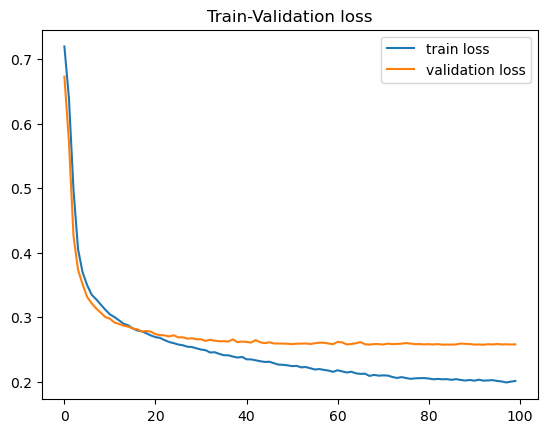

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57400/57400 [1:05:22<00:00, 14.64it/s]


In [14]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

st.train_function_early_stop(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path='m1_bert_simple_ABOUT_best')

# TO

In [15]:
model = st.SingleTaskSimple(confs.bert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  1%|          | 573/57400 [00:37<1:03:20, 14.95it/s]

Epoch 1 	 Training loss: 0.7470334182632925 	 Validation loss: 0.7043205782518549 


  1%|          | 577/57400 [00:39<3:41:47,  4.27it/s]

  1%|          | 574/57400 [00:39<1:03:20, 14.95it/s]


  2%|‚ñè         | 1147/57400 [01:17<1:07:31, 13.88it/s]

Epoch 2 	 Training loss: 0.7050231734634692 	 Validation loss: 0.6984736070794574 


  2%|‚ñè         | 1149/57400 [01:18<4:46:24,  3.27it/s]

  2%|‚ñè         | 1148/57400 [01:18<1:07:31, 13.88it/s]


  3%|‚ñé         | 1721/57400 [01:56<1:05:46, 14.11it/s]

Epoch 3 	 Training loss: 0.7006437835585365 	 Validation loss: 0.6966145836700828 


  3%|‚ñé         | 1725/57400 [01:58<3:38:05,  4.25it/s]

  3%|‚ñé         | 1722/57400 [01:57<1:05:46, 14.11it/s]


  4%|‚ñç         | 2294/57400 [02:35<1:01:46, 14.87it/s]

Epoch 4 	 Training loss: 0.6991102104610682 	 Validation loss: 0.69502436306517 


  4%|‚ñç         | 2299/57400 [02:37<3:23:31,  4.51it/s]

  4%|‚ñç         | 2296/57400 [02:37<1:01:46, 14.87it/s]


  5%|‚ñå         | 2873/57400 [03:16<3:07:47,  4.84it/s]

Epoch 5 	 Training loss: 0.697867774485711 	 Validation loss: 0.6964143524735661 

1 epoch without improvement
  5%|‚ñå         | 2870/57400 [03:16<58:25, 15.56it/s]


  6%|‚ñå         | 3444/57400 [03:54<56:22, 15.95it/s]  

Epoch 6 	 Training loss: 0.6971471844442215 	 Validation loss: 0.6947337409197274 


  6%|‚ñå         | 3446/57400 [03:55<4:34:31,  3.28it/s]

  6%|‚ñå         | 3444/57400 [03:55<56:22, 15.95it/s]


  7%|‚ñã         | 4020/57400 [04:34<3:46:10,  3.93it/s]

Epoch 7 	 Training loss: 0.6968739101280319 	 Validation loss: 0.6952353705794124 
  7%|‚ñã         | 4018/57400 [04:34<54:40, 16.27it/s]


  8%|‚ñä         | 4592/57400 [05:12<55:10, 15.95it/s]  

Epoch 8 	 Training loss: 0.6965566305540996 	 Validation loss: 0.6937237452652495 


  8%|‚ñä         | 4594/57400 [05:14<4:34:04,  3.21it/s]

  8%|‚ñä         | 4592/57400 [05:14<55:10, 15.95it/s]


  9%|‚ñâ         | 5167/57400 [05:53<3:50:59,  3.77it/s]

Epoch 9 	 Training loss: 0.6961839616506357 	 Validation loss: 0.6946321372258462 
  9%|‚ñâ         | 5166/57400 [05:53<57:36, 15.11it/s]


 10%|‚ñà         | 5743/57400 [06:32<2:57:47,  4.84it/s]

Epoch 10 	 Training loss: 0.6960597755809279 	 Validation loss: 0.6945727315999694 
 10%|‚ñà         | 5740/57400 [06:32<53:14, 16.17it/s]


 11%|‚ñà         | 6317/57400 [07:11<2:52:35,  4.93it/s]

Epoch 11 	 Training loss: 0.6956571263718688 	 Validation loss: 0.6948646509041221 

1 epoch without improvement
 11%|‚ñà         | 6314/57400 [07:11<53:48, 15.82it/s]


 12%|‚ñà‚ñè        | 6890/57400 [07:50<3:40:53,  3.81it/s]

Epoch 12 	 Training loss: 0.6955017863873405 	 Validation loss: 0.6939201506517702 
 12%|‚ñà‚ñè        | 6888/57400 [07:50<52:35, 16.01it/s]


 13%|‚ñà‚ñé        | 7464/57400 [08:29<3:39:32,  3.79it/s]

Epoch 13 	 Training loss: 0.6953997919368412 	 Validation loss: 0.6945709767988173 
 13%|‚ñà‚ñé        | 7462/57400 [08:29<49:37, 16.77it/s]


 14%|‚ñà‚ñç        | 8038/57400 [09:08<3:23:09,  4.05it/s]

Epoch 14 	 Training loss: 0.6950749939742404 	 Validation loss: 0.6942333710395684 
 14%|‚ñà‚ñç        | 8036/57400 [09:08<48:51, 16.84it/s]


 15%|‚ñà‚ñç        | 8608/57400 [09:46<55:50, 14.56it/s]  

Epoch 15 	 Training loss: 0.6950544219606845 	 Validation loss: 0.6930274862354084 


 15%|‚ñà‚ñå        | 8613/57400 [09:48<2:57:47,  4.57it/s]

 15%|‚ñà‚ñå        | 8610/57400 [09:47<55:50, 14.56it/s]


 16%|‚ñà‚ñå        | 9185/57400 [10:26<3:29:25,  3.84it/s]

Epoch 16 	 Training loss: 0.6949268508871258 	 Validation loss: 0.6941220669423119 

1 epoch without improvement
 16%|‚ñà‚ñå        | 9184/57400 [10:26<50:05, 16.05it/s]


 17%|‚ñà‚ñã        | 9761/57400 [11:05<2:39:54,  4.97it/s]

Epoch 17 	 Training loss: 0.6948782093433553 	 Validation loss: 0.6937980864007595 
 17%|‚ñà‚ñã        | 9758/57400 [11:05<50:01, 15.87it/s]


 18%|‚ñà‚ñä        | 10335/57400 [11:44<2:43:09,  4.81it/s]

Epoch 18 	 Training loss: 0.6945957433471281 	 Validation loss: 0.693860263137494 
 18%|‚ñà‚ñä        | 10332/57400 [11:44<53:24, 14.69it/s]


 19%|‚ñà‚ñâ        | 10908/57400 [12:24<3:25:12,  3.78it/s]

Epoch 19 	 Training loss: 0.6947759219578334 	 Validation loss: 0.6932606535442805 
 19%|‚ñà‚ñâ        | 10906/57400 [12:23<49:07, 15.77it/s]


 20%|‚ñà‚ñà        | 11483/57400 [13:03<2:23:30,  5.33it/s]

Epoch 20 	 Training loss: 0.6946482889951314 	 Validation loss: 0.6942309201773951 

2 epoch without improvement
 20%|‚ñà‚ñà        | 11480/57400 [13:02<50:32, 15.14it/s]


 21%|‚ñà‚ñà        | 12054/57400 [13:40<46:58, 16.09it/s]  

Epoch 21 	 Training loss: 0.6949855952105041 	 Validation loss: 0.6926842392501185 


 21%|‚ñà‚ñà        | 12056/57400 [13:42<3:51:46,  3.26it/s]

 21%|‚ñà‚ñà        | 12054/57400 [13:42<46:58, 16.09it/s]


 22%|‚ñà‚ñà‚ñè       | 12631/57400 [14:21<2:18:43,  5.38it/s]

Epoch 22 	 Training loss: 0.6947587334943566 	 Validation loss: 0.6930989865529336 
 22%|‚ñà‚ñà‚ñè       | 12628/57400 [14:21<49:28, 15.08it/s]


 23%|‚ñà‚ñà‚ñé       | 13205/57400 [15:00<2:27:37,  4.99it/s]

Epoch 23 	 Training loss: 0.6945980283649126 	 Validation loss: 0.6947043053174423 

1 epoch without improvement
 23%|‚ñà‚ñà‚ñé       | 13202/57400 [15:00<48:22, 15.23it/s]


 24%|‚ñà‚ñà‚ñç       | 13779/57400 [15:39<2:19:44,  5.20it/s]

Epoch 24 	 Training loss: 0.6945400897426472 	 Validation loss: 0.6935525233462706 
 24%|‚ñà‚ñà‚ñç       | 13776/57400 [15:39<49:18, 14.74it/s]


 25%|‚ñà‚ñà‚ñå       | 14353/57400 [16:18<2:24:16,  4.97it/s]

Epoch 25 	 Training loss: 0.6944397986973619 	 Validation loss: 0.6942453616756504 

2 epoch without improvement
 25%|‚ñà‚ñà‚ñå       | 14350/57400 [16:18<48:29, 14.80it/s]


 26%|‚ñà‚ñà‚ñå       | 14925/57400 [16:57<3:06:49,  3.79it/s]

Epoch 26 	 Training loss: 0.6945292137641109 	 Validation loss: 0.69463376069473 

3 epoch without improvement
 26%|‚ñà‚ñà‚ñå       | 14924/57400 [16:57<43:40, 16.21it/s]


 27%|‚ñà‚ñà‚ñã       | 15501/57400 [17:36<2:12:47,  5.26it/s]

Epoch 27 	 Training loss: 0.6944377188690863 	 Validation loss: 0.694367640099283 

4 epoch without improvement
 27%|‚ñà‚ñà‚ñã       | 15498/57400 [17:36<48:40, 14.35it/s]


 28%|‚ñà‚ñà‚ñä       | 16075/57400 [18:15<2:18:51,  4.96it/s]

Epoch 28 	 Training loss: 0.694402429077268 	 Validation loss: 0.6939026107222347 

5 epoch without improvement
 28%|‚ñà‚ñà‚ñä       | 16072/57400 [18:15<46:54, 14.68it/s]


 29%|‚ñà‚ñà‚ñâ       | 16649/57400 [18:54<2:09:45,  5.23it/s]

Epoch 29 	 Training loss: 0.694265076299993 	 Validation loss: 0.6944768438904972 

6 epoch without improvement
 29%|‚ñà‚ñà‚ñâ       | 16646/57400 [18:54<46:50, 14.50it/s]


 30%|‚ñà‚ñà‚ñà       | 17221/57400 [19:33<2:57:33,  3.77it/s]

Epoch 30 	 Training loss: 0.6944243072009668 	 Validation loss: 0.6946457402180817 

7 epoch without improvement
 30%|‚ñà‚ñà‚ñà       | 17220/57400 [19:33<45:06, 14.84it/s]


 31%|‚ñà‚ñà‚ñà       | 17797/57400 [20:12<2:12:38,  4.98it/s]

Epoch 31 	 Training loss: 0.6944204757853252 	 Validation loss: 0.6946120393478264 

8 epoch without improvement
 31%|‚ñà‚ñà‚ñà       | 17794/57400 [20:12<40:49, 16.17it/s]


 32%|‚ñà‚ñà‚ñà‚ñè      | 18370/57400 [20:52<2:53:19,  3.75it/s]

Epoch 32 	 Training loss: 0.694657386491523 	 Validation loss: 0.6935011259580063 
 32%|‚ñà‚ñà‚ñà‚ñè      | 18368/57400 [20:51<39:43, 16.38it/s]


 33%|‚ñà‚ñà‚ñà‚ñé      | 18945/57400 [21:32<2:11:22,  4.88it/s]

Epoch 33 	 Training loss: 0.6941957933769825 	 Validation loss: 0.6929834747718553 
 33%|‚ñà‚ñà‚ñà‚ñé      | 18942/57400 [21:32<46:27, 13.79it/s]


 34%|‚ñà‚ñà‚ñà‚ñç      | 19519/57400 [22:14<2:18:15,  4.57it/s]

Epoch 34 	 Training loss: 0.6942620004303364 	 Validation loss: 0.6931685653783507 
 34%|‚ñà‚ñà‚ñà‚ñç      | 19516/57400 [22:14<49:12, 12.83it/s]


 35%|‚ñà‚ñà‚ñà‚ñç      | 20089/57400 [22:53<39:29, 15.75it/s]  

Epoch 35 	 Training loss: 0.6942286558890592 	 Validation loss: 0.692628170474101 


 35%|‚ñà‚ñà‚ñà‚ñå      | 20093/57400 [22:55<2:30:34,  4.13it/s]

 35%|‚ñà‚ñà‚ñà‚ñå      | 20090/57400 [22:55<39:29, 15.75it/s]


 36%|‚ñà‚ñà‚ñà‚ñå      | 20667/57400 [23:35<2:00:11,  5.09it/s]

Epoch 36 	 Training loss: 0.6943375568979708 	 Validation loss: 0.6929112420243732 
 36%|‚ñà‚ñà‚ñà‚ñå      | 20664/57400 [23:35<46:46, 13.09it/s]


 37%|‚ñà‚ñà‚ñà‚ñã      | 21240/57400 [24:15<2:43:05,  3.70it/s]

Epoch 37 	 Training loss: 0.694239331766288 	 Validation loss: 0.6927437459008169 
 37%|‚ñà‚ñà‚ñà‚ñã      | 21238/57400 [24:15<36:48, 16.37it/s]


 38%|‚ñà‚ñà‚ñà‚ñä      | 21812/57400 [24:53<39:06, 15.16it/s]  

Epoch 38 	 Training loss: 0.6939314448044275 	 Validation loss: 0.6924940529516188 


 38%|‚ñà‚ñà‚ñà‚ñä      | 21814/57400 [24:55<3:08:42,  3.14it/s]

 38%|‚ñà‚ñà‚ñà‚ñä      | 21812/57400 [24:55<39:06, 15.16it/s]


 39%|‚ñà‚ñà‚ñà‚ñâ      | 22389/57400 [25:35<1:59:28,  4.88it/s]

Epoch 39 	 Training loss: 0.6943808152285187 	 Validation loss: 0.6936761837894634 

1 epoch without improvement
 39%|‚ñà‚ñà‚ñà‚ñâ      | 22386/57400 [25:35<37:44, 15.46it/s]


 40%|‚ñà‚ñà‚ñà‚ñà      | 22963/57400 [26:15<1:58:39,  4.84it/s]

Epoch 40 	 Training loss: 0.6938882576048582 	 Validation loss: 0.6931933932385203 
 40%|‚ñà‚ñà‚ñà‚ñà      | 22960/57400 [26:15<40:03, 14.33it/s]


 41%|‚ñà‚ñà‚ñà‚ñà      | 23536/57400 [26:55<2:35:43,  3.62it/s]

Epoch 41 	 Training loss: 0.6941393581624645 	 Validation loss: 0.6933882165763338 
 41%|‚ñà‚ñà‚ñà‚ñà      | 23534/57400 [26:55<37:34, 15.02it/s]


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 24108/57400 [27:34<37:03, 14.97it/s]  

Epoch 42 	 Training loss: 0.6939087782171961 	 Validation loss: 0.6919324933472326 


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 24110/57400 [27:35<2:51:17,  3.24it/s]

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 24108/57400 [27:35<37:03, 14.97it/s]


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 24685/57400 [28:15<1:43:43,  5.26it/s]

Epoch 43 	 Training loss: 0.6941379732371208 	 Validation loss: 0.692384533962961 
 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 24682/57400 [28:15<34:47, 15.67it/s]


 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 25258/57400 [28:55<2:27:23,  3.63it/s]

Epoch 44 	 Training loss: 0.6941691371206623 	 Validation loss: 0.6926182660005861 
 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 25256/57400 [28:55<33:02, 16.21it/s]


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 25831/57400 [29:35<2:21:31,  3.72it/s]

Epoch 45 	 Training loss: 0.6941678931073445 	 Validation loss: 0.6936089861190925 

1 epoch without improvement
 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 25830/57400 [29:35<33:41, 15.62it/s]


 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 26406/57400 [30:15<2:18:33,  3.73it/s]

Epoch 46 	 Training loss: 0.6938395153354685 	 Validation loss: 0.6936266715243712 

2 epoch without improvement
 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 26404/57400 [30:15<32:27, 15.91it/s]


 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 26979/57400 [30:55<2:09:44,  3.91it/s]

Epoch 47 	 Training loss: 0.694031235336842 	 Validation loss: 0.6939289064730628 

3 epoch without improvement
 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 26978/57400 [30:55<32:05, 15.80it/s]


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 27555/57400 [31:35<1:39:59,  4.97it/s]

Epoch 48 	 Training loss: 0.693841927246765 	 Validation loss: 0.6926365120936249 
 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 27552/57400 [31:35<37:38, 13.21it/s]


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 28127/57400 [32:15<2:13:10,  3.66it/s]

Epoch 49 	 Training loss: 0.6941003651984478 	 Validation loss: 0.6934798925609912 

4 epoch without improvement
 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 28126/57400 [32:15<33:33, 14.54it/s]


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 28702/57400 [32:55<2:11:45,  3.63it/s]

Epoch 50 	 Training loss: 0.693803062630032 	 Validation loss: 0.6941739340959969 

5 epoch without improvement
 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 28700/57400 [32:55<31:37, 15.12it/s]


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 29276/57400 [33:35<2:08:46,  3.64it/s]

Epoch 51 	 Training loss: 0.6941253775503577 	 Validation loss: 0.6936014456264044 

6 epoch without improvement
 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 29274/57400 [33:35<29:47, 15.74it/s]


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 29850/57400 [34:15<2:06:06,  3.64it/s]

Epoch 52 	 Training loss: 0.6938686848517495 	 Validation loss: 0.6936953007164648 

7 epoch without improvement
 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 29848/57400 [34:15<29:53, 15.36it/s]


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 30423/57400 [34:55<2:02:20,  3.68it/s]

Epoch 53 	 Training loss: 0.6937023600634797 	 Validation loss: 0.6927475343316288 
 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 30422/57400 [34:55<28:37, 15.71it/s]


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 30998/57400 [35:35<2:00:23,  3.66it/s]

Epoch 54 	 Training loss: 0.6936688787638102 	 Validation loss: 0.6924034276251065 
 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 30996/57400 [35:35<28:31, 15.43it/s]


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 31573/57400 [36:15<1:27:56,  4.90it/s]

Epoch 55 	 Training loss: 0.6937805237670394 	 Validation loss: 0.6928469558893624 
 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 31570/57400 [36:14<29:02, 14.82it/s]


 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 32145/57400 [36:54<1:55:34,  3.64it/s]

Epoch 56 	 Training loss: 0.6938191990819127 	 Validation loss: 0.6929258067729109 
 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 32144/57400 [36:54<27:21, 15.39it/s]


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 32720/57400 [37:34<1:45:56,  3.88it/s]

Epoch 57 	 Training loss: 0.6936823663395871 	 Validation loss: 0.6933309688406476 

8 epoch without improvement
 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 32718/57400 [37:34<25:08, 16.37it/s]


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 33294/57400 [38:13<1:42:58,  3.90it/s]

Epoch 58 	 Training loss: 0.693947908043446 	 Validation loss: 0.6939103835720127 

9 epoch without improvement
 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 33292/57400 [38:13<24:15, 16.57it/s]


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 33865/57400 [38:50<26:33, 14.77it/s]  

Epoch 59 	 Training loss: 0.6938464861713636 	 Validation loss: 0.6933847261687457 

10 epoch without improvement
Validation_loss hasn't improve in 10 epoch. Stopping training after 59 epochs...


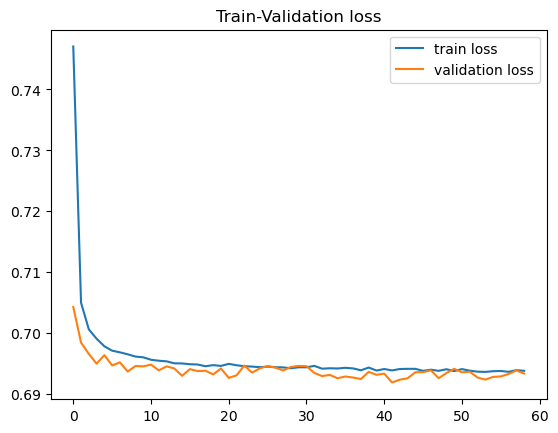

 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 33866/57400 [38:52<27:00, 14.52it/s]


In [16]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

st.train_function_early_stop(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path='m1_bert_simple_TO_best')

# AS

In [17]:
model = st.SingleTaskSimple(confs.bert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  1%|          | 574/57400 [00:37<57:27, 16.49it/s]  

Epoch 1 	 Training loss: 0.7536676745173823 	 Validation loss: 0.7020601296828965 


  1%|          | 576/57400 [00:39<4:47:32,  3.29it/s]

  1%|          | 574/57400 [00:39<57:27, 16.49it/s]


  2%|‚ñè         | 1147/57400 [01:16<1:03:25, 14.78it/s]

Epoch 2 	 Training loss: 0.7045149192577456 	 Validation loss: 0.6959219928515159 


  2%|‚ñè         | 1151/57400 [01:18<3:38:11,  4.30it/s]

  2%|‚ñè         | 1148/57400 [01:18<1:03:25, 14.78it/s]


  3%|‚ñé         | 1724/57400 [01:57<3:51:28,  4.01it/s]

Epoch 3 	 Training loss: 0.6996768071261017 	 Validation loss: 0.6960560497591051 
  3%|‚ñé         | 1722/57400 [01:57<56:19, 16.48it/s]


  4%|‚ñç         | 2294/57400 [02:35<58:54, 15.59it/s]  

Epoch 4 	 Training loss: 0.6971542621323455 	 Validation loss: 0.694577330249851 


  4%|‚ñç         | 2299/57400 [02:37<3:18:32,  4.63it/s]

  4%|‚ñç         | 2296/57400 [02:37<58:54, 15.59it/s]


  5%|‚ñç         | 2869/57400 [03:14<58:25, 15.56it/s]  

Epoch 5 	 Training loss: 0.6961337148312492 	 Validation loss: 0.6936525692374019 


  5%|‚ñå         | 2873/57400 [03:16<3:33:01,  4.27it/s]

  5%|‚ñå         | 2870/57400 [03:16<58:25, 15.56it/s]


  6%|‚ñå         | 3444/57400 [03:54<54:18, 16.56it/s]  

Epoch 6 	 Training loss: 0.6954400827037333 	 Validation loss: 0.6931115974814205 


  6%|‚ñå         | 3446/57400 [03:55<4:39:01,  3.22it/s]

  6%|‚ñå         | 3444/57400 [03:55<54:18, 16.56it/s]


  7%|‚ñã         | 4021/57400 [04:35<3:03:25,  4.85it/s]

Epoch 7 	 Training loss: 0.694382420296453 	 Validation loss: 0.694504901514215 

1 epoch without improvement
  7%|‚ñã         | 4018/57400 [04:34<56:12, 15.83it/s]


  8%|‚ñä         | 4590/57400 [05:12<1:00:50, 14.47it/s]

Epoch 8 	 Training loss: 0.6943474386004206 	 Validation loss: 0.6924909828072887 


  8%|‚ñä         | 4593/57400 [05:14<4:06:50,  3.57it/s]

  8%|‚ñä         | 4592/57400 [05:14<1:00:50, 14.47it/s]


  9%|‚ñâ         | 5166/57400 [05:51<54:41, 15.92it/s]  

Epoch 9 	 Training loss: 0.6935681109852077 	 Validation loss: 0.6923717381590504 


  9%|‚ñâ         | 5168/57400 [05:53<4:28:00,  3.25it/s]

  9%|‚ñâ         | 5166/57400 [05:53<54:41, 15.92it/s]


 10%|‚ñà         | 5742/57400 [06:32<3:52:38,  3.70it/s]

Epoch 10 	 Training loss: 0.6931948251632863 	 Validation loss: 0.6927005002054117 
 10%|‚ñà         | 5740/57400 [06:32<52:25, 16.42it/s]


 11%|‚ñà         | 6315/57400 [07:11<3:25:46,  4.14it/s]

Epoch 11 	 Training loss: 0.6924704020447017 	 Validation loss: 0.6936575911812863 

1 epoch without improvement
 11%|‚ñà         | 6314/57400 [07:11<57:14, 14.87it/s]


 12%|‚ñà‚ñè        | 6888/57400 [07:49<53:38, 15.69it/s]  

Epoch 12 	 Training loss: 0.6924600456857515 	 Validation loss: 0.6911944817688506 


 12%|‚ñà‚ñè        | 6890/57400 [07:51<4:22:50,  3.20it/s]

 12%|‚ñà‚ñè        | 6888/57400 [07:51<53:38, 15.69it/s]


 13%|‚ñà‚ñé        | 7465/57400 [08:30<2:49:30,  4.91it/s]

Epoch 13 	 Training loss: 0.6921584930154089 	 Validation loss: 0.6923008652056678 

1 epoch without improvement
 13%|‚ñà‚ñé        | 7462/57400 [08:30<52:33, 15.84it/s]


 14%|‚ñà‚ñç        | 8038/57400 [09:09<3:32:15,  3.88it/s]

Epoch 14 	 Training loss: 0.6919807391922649 	 Validation loss: 0.6932811767367993 

2 epoch without improvement
 14%|‚ñà‚ñç        | 8036/57400 [09:09<51:23, 16.01it/s]


 15%|‚ñà‚ñå        | 8613/57400 [09:48<2:49:47,  4.79it/s]

Epoch 15 	 Training loss: 0.6918953202327369 	 Validation loss: 0.6921807214365168 
 15%|‚ñà‚ñå        | 8610/57400 [09:48<52:43, 15.43it/s]


 16%|‚ñà‚ñå        | 9183/57400 [10:25<51:42, 15.54it/s]  

Epoch 16 	 Training loss: 0.6913180084386353 	 Validation loss: 0.6899145952725815 


 16%|‚ñà‚ñå        | 9187/57400 [10:27<3:07:32,  4.28it/s]

 16%|‚ñà‚ñå        | 9184/57400 [10:27<51:42, 15.54it/s]


 17%|‚ñà‚ñã        | 9760/57400 [11:06<3:35:54,  3.68it/s]

Epoch 17 	 Training loss: 0.6908315763863953 	 Validation loss: 0.6907383213608952 
 17%|‚ñà‚ñã        | 9758/57400 [11:06<52:39, 15.08it/s]


 18%|‚ñà‚ñä        | 10335/57400 [11:45<2:42:11,  4.84it/s]

Epoch 18 	 Training loss: 0.6907938405196425 	 Validation loss: 0.6903316934229964 
 18%|‚ñà‚ñä        | 10332/57400 [11:45<48:58, 16.02it/s]


 19%|‚ñà‚ñâ        | 10909/57400 [12:25<2:34:23,  5.02it/s]

Epoch 19 	 Training loss: 0.6909138535373303 	 Validation loss: 0.6907909957029051 
 19%|‚ñà‚ñâ        | 10906/57400 [12:24<48:34, 15.95it/s]


 20%|‚ñà‚ñà        | 11480/57400 [13:02<45:40, 16.76it/s]  

Epoch 20 	 Training loss: 0.691200537756345 	 Validation loss: 0.6890031008397118 


 20%|‚ñà‚ñà        | 11482/57400 [13:04<3:56:36,  3.23it/s]

 20%|‚ñà‚ñà        | 11480/57400 [13:04<45:40, 16.76it/s]


 21%|‚ñà‚ñà        | 12057/57400 [13:43<2:31:38,  4.98it/s]

Epoch 21 	 Training loss: 0.6903451668676184 	 Validation loss: 0.6920265868558722 

1 epoch without improvement
 21%|‚ñà‚ñà        | 12054/57400 [13:43<47:12, 16.01it/s]


 22%|‚ñà‚ñà‚ñè       | 12631/57400 [14:22<2:26:07,  5.11it/s]

Epoch 22 	 Training loss: 0.690278092327849 	 Validation loss: 0.6924399541596234 

2 epoch without improvement
 22%|‚ñà‚ñà‚ñè       | 12628/57400 [14:22<50:48, 14.69it/s]


 23%|‚ñà‚ñà‚ñé       | 13205/57400 [15:01<2:18:07,  5.33it/s]

Epoch 23 	 Training loss: 0.6902912975603696 	 Validation loss: 0.6923412488678754 

3 epoch without improvement
 23%|‚ñà‚ñà‚ñé       | 13202/57400 [15:01<49:07, 14.99it/s]


 24%|‚ñà‚ñà‚ñç       | 13779/57400 [15:40<2:17:41,  5.28it/s]

Epoch 24 	 Training loss: 0.6900894301278251 	 Validation loss: 0.6910855850930941 

4 epoch without improvement
 24%|‚ñà‚ñà‚ñç       | 13776/57400 [15:40<49:11, 14.78it/s]


 25%|‚ñà‚ñà‚ñå       | 14353/57400 [16:19<2:14:51,  5.32it/s]

Epoch 25 	 Training loss: 0.6901249418275281 	 Validation loss: 0.6917549412129289 

5 epoch without improvement
 25%|‚ñà‚ñà‚ñå       | 14350/57400 [16:19<48:26, 14.81it/s]


 26%|‚ñà‚ñà‚ñå       | 14926/57400 [16:58<2:57:52,  3.98it/s]

Epoch 26 	 Training loss: 0.6895611098211402 	 Validation loss: 0.6929571547750699 

6 epoch without improvement
 26%|‚ñà‚ñà‚ñå       | 14924/57400 [16:58<43:20, 16.34it/s]


 27%|‚ñà‚ñà‚ñã       | 15501/57400 [17:37<2:21:50,  4.92it/s]

Epoch 27 	 Training loss: 0.6894070488442943 	 Validation loss: 0.6927750696570186 

7 epoch without improvement
 27%|‚ñà‚ñà‚ñã       | 15498/57400 [17:37<48:08, 14.51it/s]


 28%|‚ñà‚ñà‚ñä       | 16074/57400 [18:16<3:04:48,  3.73it/s]

Epoch 28 	 Training loss: 0.6893264004370061 	 Validation loss: 0.6913349446603807 

8 epoch without improvement
 28%|‚ñà‚ñà‚ñä       | 16072/57400 [18:16<42:21, 16.26it/s]


 29%|‚ñà‚ñà‚ñâ       | 16648/57400 [18:55<3:07:31,  3.62it/s]

Epoch 29 	 Training loss: 0.6892863305395904 	 Validation loss: 0.692931004499985 

9 epoch without improvement
 29%|‚ñà‚ñà‚ñâ       | 16646/57400 [18:55<43:11, 15.72it/s]


 30%|‚ñà‚ñà‚ñâ       | 17218/57400 [19:33<44:28, 15.06it/s]  

Epoch 30 	 Training loss: 0.6892298590846178 	 Validation loss: 0.6912916272373523 

10 epoch without improvement
Validation_loss hasn't improve in 10 epoch. Stopping training after 30 epochs...


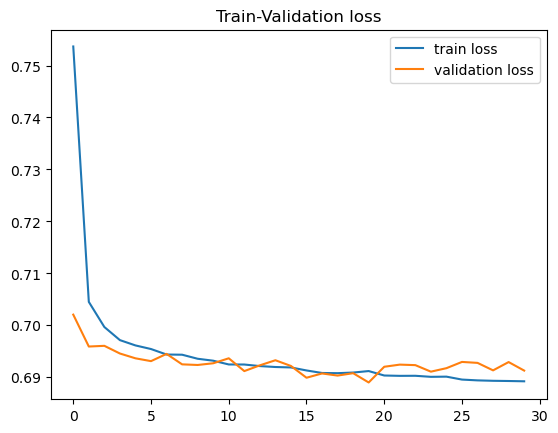

 30%|‚ñà‚ñà‚ñà       | 17220/57400 [19:34<45:41, 14.66it/s]


In [18]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

st.train_function_early_stop(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path='m1_bert_simple_AS_best')

# EVALUACI√ìN MODELOS

In [19]:
model = st.SingleTaskSimple(confs.bert_conf).to(device)
model.load_state_dict(torch.load('m1_bert_simple_ABOUT_best'))

print('ABOUT\n')
for task in ['about','to','as']:
    print(f'Evaluaci√≥n en la tarea {task}')
    print("Using huggingface datasets accuracy")
    print(st.eval_function_single(model,dl_eval[task],'accuracy'))
    print("Using scikit learn accuracy")
    print(st.eval_function_single_sk(model,dl_eval[task]),'\n')

model = st.SingleTaskSimple(confs.bert_conf).to(device)
model.load_state_dict(torch.load('m1_bert_simple_TO_best'))
print('TO\n')
for task in ['about','to','as']:
    print(f'Evaluaci√≥n en la tarea {task}')
    print("Using huggingface datasets accuracy")
    print(st.eval_function_single(model,dl_eval[task],'accuracy'))
    print("Using scikit learn accuracy")
    print(st.eval_function_single_sk(model,dl_eval[task]),'\n')

model = st.SingleTaskSimple(confs.bert_conf).to(device)
model.load_state_dict(torch.load('m1_bert_simple_AS_best'))
print('AS\n')
for task in ['about','to','as']:
    print(f'Evaluaci√≥n en la tarea {task}')
    print("Using huggingface datasets accuracy")
    print(st.eval_function_single(model,dl_eval[task],'accuracy'))
    print("Using scikit learn accuracy")
    print(st.eval_function_single_sk(model,dl_eval[task]),'\n')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ABOUT

Evaluaci√≥n en la tarea about
Using huggingface datasets accuracy


c:\Users\FarinhOso\Desktop\Kuina TFG\Codigo\singletask_simple.py:354: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric(metric_name) # Se podria modificar en funcion del tipo de tarea


{'accuracy': 0.8533163265306123}
Using scikit learn accuracy
0.8533163265306123 

Evaluaci√≥n en la tarea to
Using huggingface datasets accuracy
{'accuracy': 0.7159090909090909}
Using scikit learn accuracy
0.7159090909090909 

Evaluaci√≥n en la tarea as
Using huggingface datasets accuracy
{'accuracy': 0.6805736636245111}
Using scikit learn accuracy
0.6805736636245111 



Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TO

Evaluaci√≥n en la tarea about
Using huggingface datasets accuracy
{'accuracy': 0.5267857142857143}
Using scikit learn accuracy
0.5267857142857143 

Evaluaci√≥n en la tarea to
Using huggingface datasets accuracy
{'accuracy': 0.5075757575757576}
Using scikit learn accuracy
0.5075757575757576 

Evaluaci√≥n en la tarea as
Using huggingface datasets accuracy
{'accuracy': 0.5032594524119948}
Using scikit learn accuracy
0.5032594524119948 



Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AS

Evaluaci√≥n en la tarea about
Using huggingface datasets accuracy
{'accuracy': 0.798469387755102}
Using scikit learn accuracy
0.798469387755102 

Evaluaci√≥n en la tarea to
Using huggingface datasets accuracy
{'accuracy': 0.7474747474747475}
Using scikit learn accuracy
0.7474747474747475 

Evaluaci√≥n en la tarea as
Using huggingface datasets accuracy
{'accuracy': 0.7014341590612777}
Using scikit learn accuracy
0.7014341590612777 

